# Converting A Single Real Face Image Into Edged Image Then Concatenating

256 256


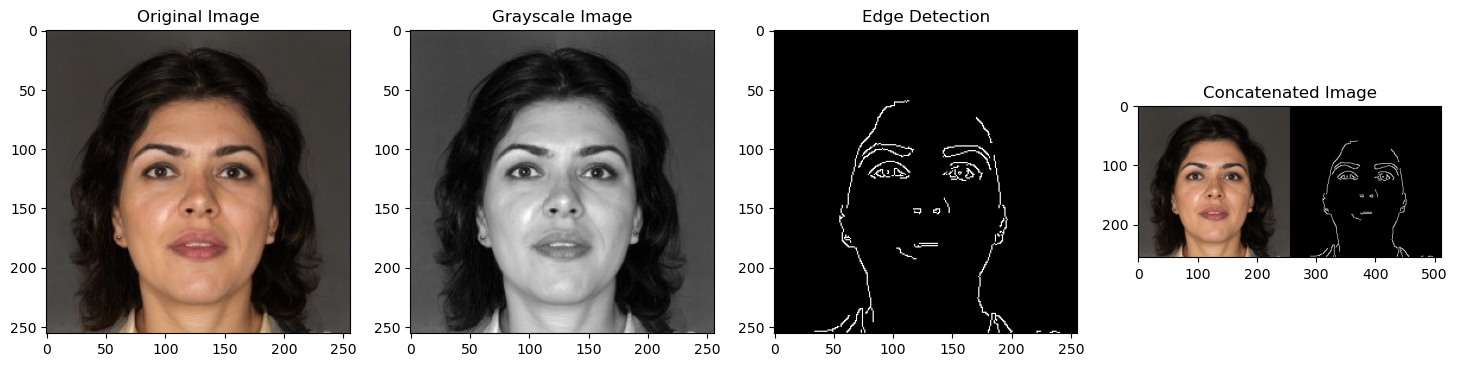

True

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "real_dataset/training_dataset/faceImage_glued_human_face_100.jpg"  # Replace with the path to your image
original_image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply edge detection using the Canny edge detector
edges = cv2.Canny(gray_image, 150, 250)  # You can adjust the threshold values (50 and 150) based on your image

# Resize the edges image to match the height of the original image
edges_resized = cv2.resize(edges, (original_image.shape[1], original_image.shape[0]))
print(original_image.shape[1],original_image.shape[0])

# Concatenate the original image and the edges side by side
concatenated_image = np.concatenate((original_image, cv2.cvtColor(edges_resized, cv2.COLOR_GRAY2BGR)), axis=1)

# Display all images in a single plot
plt.figure(figsize=(18, 6))

plt.subplot(141), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(142), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(143), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(144), plt.imshow(cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB)), plt.title('Concatenated Image')

plt.show()

# Save the concatenated image
cv2.imwrite("concatenated_image.jpg", concatenated_image)

# Converting A Whole Real Face Images Dataset Into Edged Image Then Concatenating Both Making A New Dataset

In [5]:
import cv2
import os
import numpy as np

# Set the path to your dataset
dataset_path = "real_dataset/training_dataset/"  # Replace with the path to your dataset folder
output_path = "preprocessed_dataset/"  # Replace with the desired output folder path

# Create the output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Iterate through each image in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more file extensions if needed
        # Load the image
        image_path = os.path.join(dataset_path, filename)
        original_image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        # Apply edge detection using the Canny edge detector
        edges = cv2.Canny(gray_image, 150, 250)  # You can adjust the threshold values based on your images

        # Resize the edges image to match the height of the original image
        edges_resized = cv2.resize(edges, (original_image.shape[1], original_image.shape[0]))

        # Concatenate the original image and the edges side by side
        concatenated_image = np.concatenate((original_image, cv2.cvtColor(edges_resized, cv2.COLOR_GRAY2BGR)), axis=1)

        # Save the concatenated image
        output_filename = os.path.join(output_path, filename)
        cv2.imwrite(output_filename, concatenated_image)

print("Processing complete. Concatenated images saved in:", output_path)

Processing complete. Concatenated images saved in: preprocessed_dataset/
